https://www.kaggle.com/code/quadeer15sh/getting-started-with-cnns-binary-image-classifier

## 1 Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

## 2. Visualization of Augmentation Techniques

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [4]:
datagen = ImageDataGenerator(brightness_range=[0.2, 1.2], zoom_range=0.25)

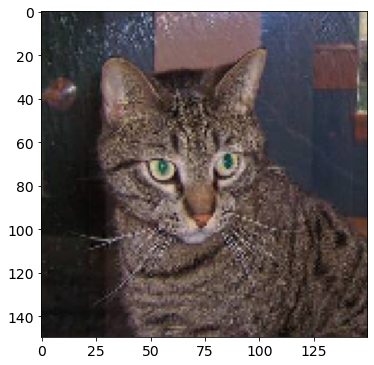

In [13]:
img = load_img(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\training_set\cats\cat.1.jpg", target_size=(150, 150))
img = img_to_array(img)/255.
plt.imshow(img)

In [14]:
img = np.expand_dims(img,axis=0)

## Visualization of 15 Augmented Sample

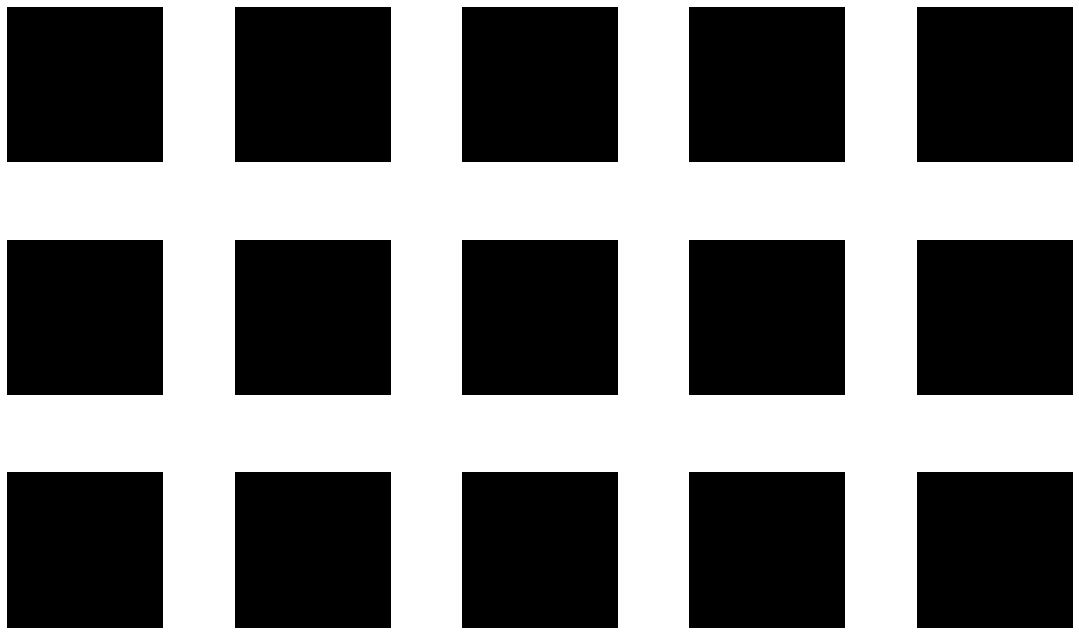

In [27]:
i = 0
plt.figure(figsize=(20,20))
for batch in datagen.flow(img, batch_size=1):
    i += 1
    plt.subplot(5 , 5,  i)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.1)
    plt.imshow(batch[0]/255.)
    plt.axis('off')
    if i > 14:
        break


### Image DataGenerator

In [43]:
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=30,
                                  brightness_range=[0.2,1.2],
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                            r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\training_set",
                            target_size=(img_size, img_size),
                            batch_size=batch_size,
                            shuffle=True,
                            class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                            r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\test_set",
                            target_size=(img_size, img_size),
                            batch_size=batch_size,
                            shuffle=False,
                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Visulization of 15 Random Sample from a Batch of 32

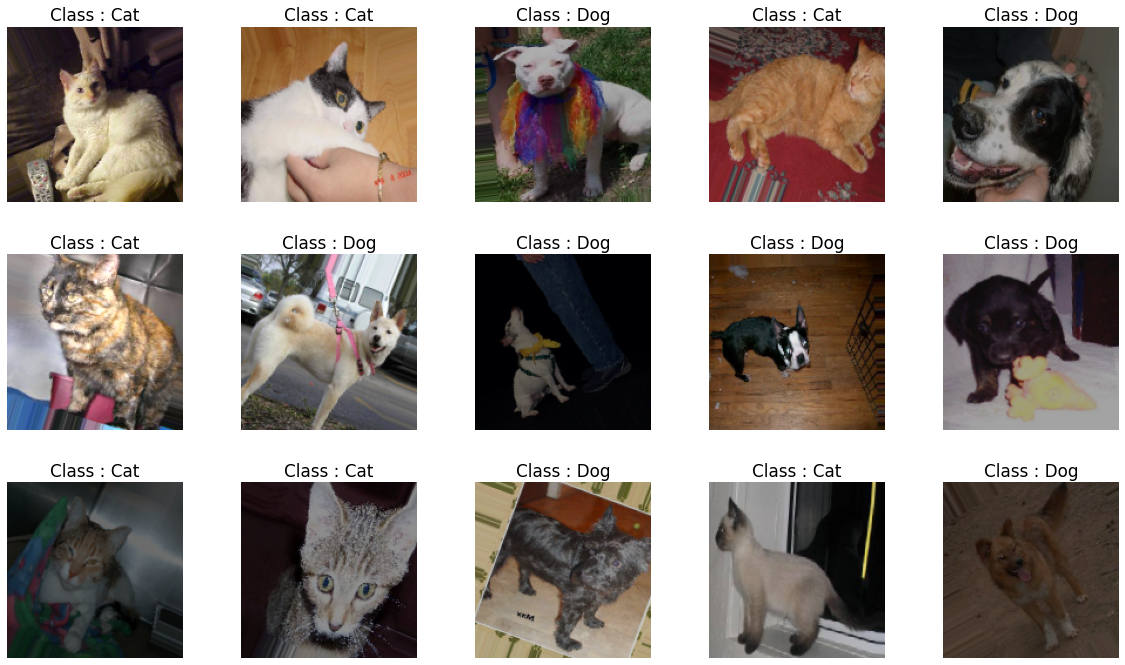

In [28]:
labels = ['Cat', 'Dog']
samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class : {labels[int(target[i])]}")
    plt.axis('off')

## Sequential API

In [30]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Layer, Flatten, Dense, Input

### Sequential

In [33]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_size, img_size, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), input_shape=(img_size, img_size, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), input_shape=(img_size, img_size, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

## Functional API

In [35]:
input_layer = Input(shape=(img_size, img_size, 3))

x = Conv2D(32, (3,3), input_shape=(img_size, img_size, 3), activation='relu', padding='same')(input_layer)
x = MaxPool2D(2,2)(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPool2D(2,2)(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPool2D(2,2)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 37, 37, 128)       7385

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

## Model CallBack

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [42]:
filepath = 'model_cnn.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

In [44]:
history = model.fit(train_generator, epochs=20, 
                   validation_data=validation_generator,
                   callbacks=[checkpoint])

Epoch 1/20
250/250 [==============================] - ETA: 0s - loss: 0.6852 - acc: 0.5638
Epoch 1: val_loss improved from inf to 0.69232, saving model to model_cnn.h5
250/250 [==============================] - 130s 496ms/step - loss: 0.6852 - acc: 0.5638 - val_loss: 0.6923 - val_acc: 0.6305
Epoch 2/20
250/250 [==============================] - ETA: 0s - loss: 0.6391 - acc: 0.6324
Epoch 2: val_loss improved from 0.69232 to 0.60966, saving model to model_cnn.h5
250/250 [==============================] - 68s 272ms/step - loss: 0.6391 - acc: 0.6324 - val_loss: 0.6097 - val_acc: 0.6745
Epoch 3/20
250/250 [==============================] - ETA: 0s - loss: 0.6151 - acc: 0.6568
Epoch 3: val_loss improved from 0.60966 to 0.56814, saving model to model_cnn.h5
250/250 [==============================] - 74s 295ms/step - loss: 0.6151 - acc: 0.6568 - val_loss: 0.5681 - val_acc: 0.6915
Epoch 4/20
250/250 [==============================] - ETA: 0s - loss: 0.5912 - acc: 0.6833
Epoch 4: val_loss did no

## Learning Curves

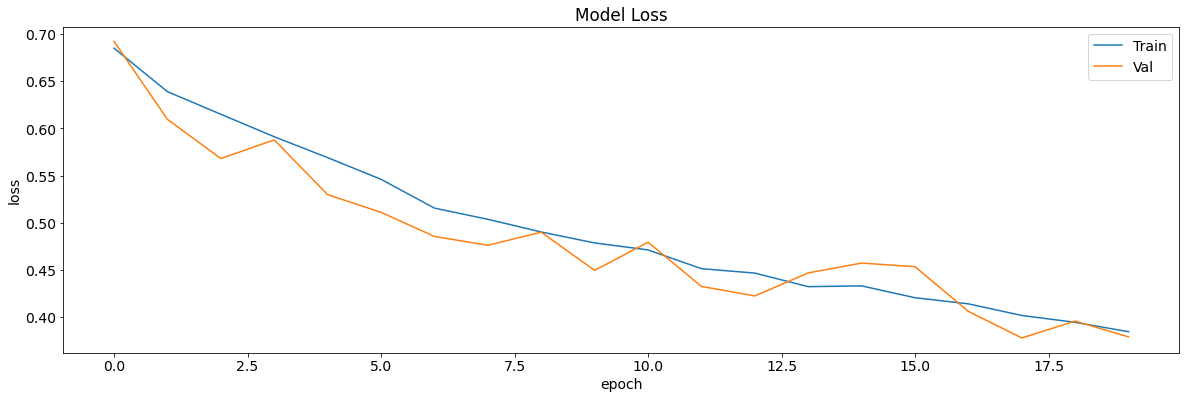

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("loss")
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right');

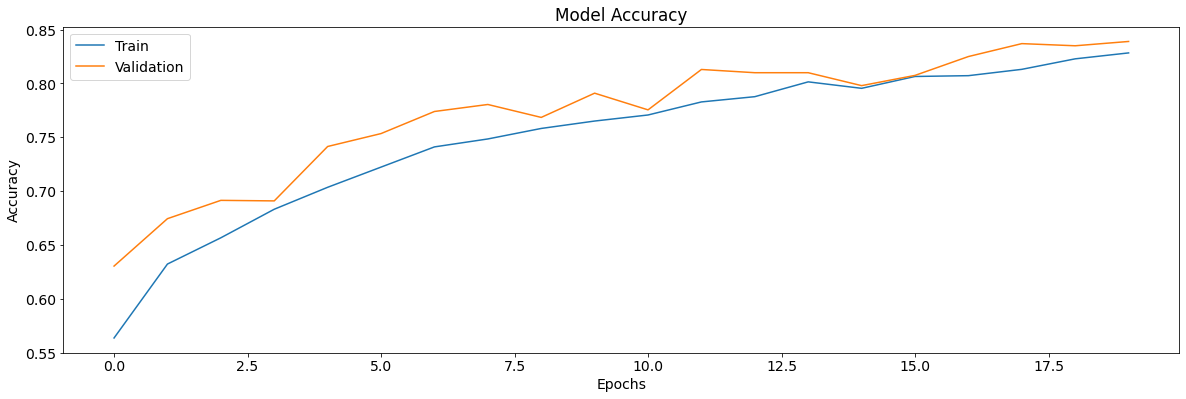

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left');

In [52]:
mdoel = tf.keras.models.load_model('model_cnn.h5')

In [53]:
y_test = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_probs = y_pred.copy()

63/63 [==============================] - 5s 80ms/step


In [54]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred < 0.5] = 0

## Validation

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

#### Classification Repost

In [57]:
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

              precision    recall  f1-score   support

         Cat       0.85      0.82      0.84      1000
         Dog       0.83      0.86      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



#### Confusion Matrics

In [60]:
confusion_matrix(y_test, y_pred)

array([[820, 180],
       [142, 858]], dtype=int64)

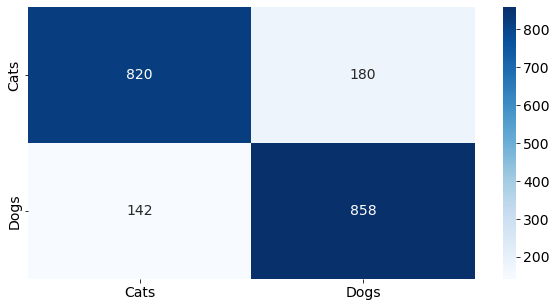

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g', xticklabels=['Cats', 'Dogs'],
           yticklabels=['Cats', 'Dogs'], cmap='Blues');

## Model Diagnosis

Create a DataFrame that stores the actual and predited classes for images as well as the prediction probabilities

In [69]:
filenames = validation_generator.filenames
data = pd.DataFrame()
data['filename'] = filenames
data['actual_class'] = y_test
data['predicted_class'] = y_pred
data['predicted_prob'] = y_pred_probs

In [70]:
misclassification = data[data['actual_class'] != data['predicted_class']]

### IQR and Hiatogram Analysis of Cates Misclassified as Dogs

<AxesSubplot:xlabel='predicted_prob'>

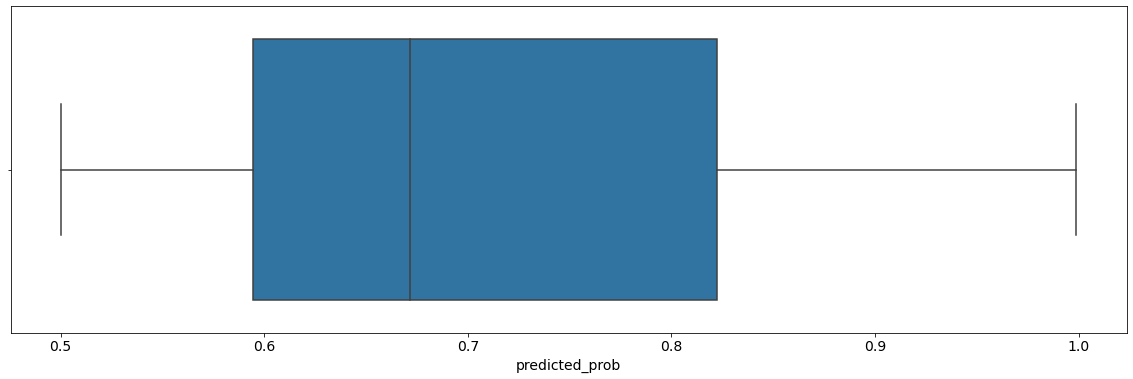

In [71]:
sns.boxplot(x=misclassification[misclassification['actual_class']==0]['predicted_prob'])

<AxesSubplot:xlabel='predicted_prob', ylabel='Count'>

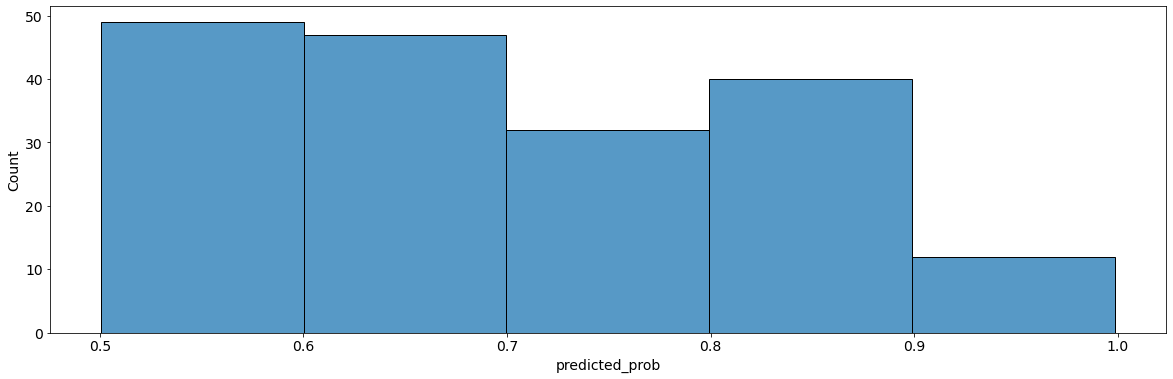

In [73]:
sns.histplot(x=misclassification[misclassification['actual_class']==0]['predicted_prob'], bins=5)

### Visualization of Misclassification Sample

In [75]:
misclassification

,filename,actual_class,predicted_class,predicted_prob
0,cats\cat.4001.jpg,0,1.0,0.750623
1,cats\cat.4002.jpg,0,1.0,0.802846
6,cats\cat.4007.jpg,0,1.0,0.655758
8,cats\cat.4009.jpg,0,1.0,0.837857
16,cats\cat.4017.jpg,0,1.0,0.775641
...,...,...,...,...
1986,dogs\dog.4987.jpg,1,0.0,0.072334
1987,dogs\dog.4988.jpg,1,0.0,0.194767
1994,dogs\dog.4995.jpg,1,0.0,0.334736
1997,dogs\dog.4998.jpg,1,0.0,0.066958


In [74]:
misclassification[(misclassification['actual_class']==0) 
                  & 
                  (misclassification['predicted_prob']>0.9)]

,filename,actual_class,predicted_class,predicted_prob
84,cats\cat.4085.jpg,0,1.0,0.981016
173,cats\cat.4174.jpg,0,1.0,0.952023
396,cats\cat.4397.jpg,0,1.0,0.975181
627,cats\cat.4628.jpg,0,1.0,0.917518
660,cats\cat.4661.jpg,0,1.0,0.906768
682,cats\cat.4683.jpg,0,1.0,0.974229
684,cats\cat.4685.jpg,0,1.0,0.970812
749,cats\cat.4750.jpg,0,1.0,0.942917
826,cats\cat.4827.jpg,0,1.0,0.932685
832,cats\cat.4833.jpg,0,1.0,0.996869


### Visualization of High Confidence Misclassifications

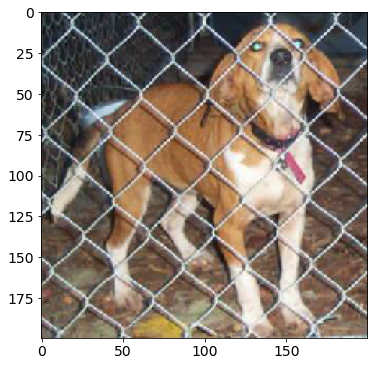

In [88]:
img = load_img(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\test_set\cats\cat.4085.jpg",
              target_size=(200, 200))
img = img_to_array(img)/255
plt.imshow(img)

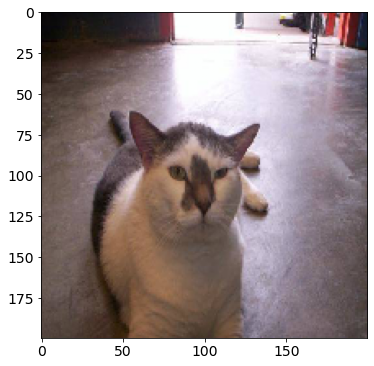

In [90]:
img = load_img(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\test_set\cats\cat.4683.jpg",
              target_size=(200, 200))
img = img_to_array(img)/255
plt.imshow(img)

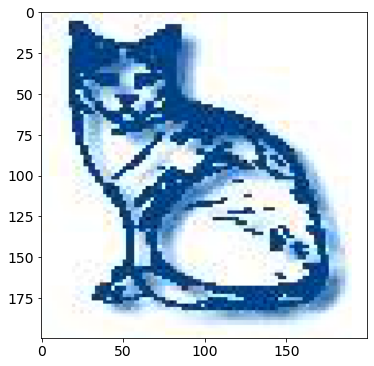

In [92]:
img = load_img(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\test_set\cats\cat.4833.jpg",
              target_size=(200, 200))
img = img_to_array(img)/255
plt.imshow(img)

### Feature Map Visualization

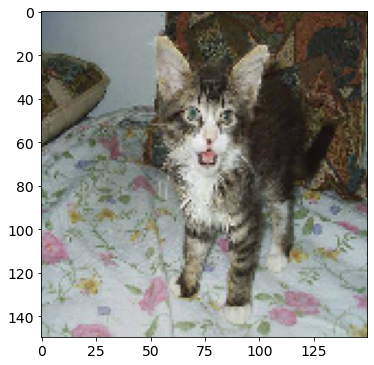

In [105]:
img = load_img(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Cat Dog Classification\dataset\test_set\cats\cat.4144.jpg",
              target_size=(150, 150))
img = img_to_array(img)/255
plt.imshow(img);

We add an additional dimensional even when we have to predict the class of one image

In [106]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

#### Pick a layer by indexing the layers list

In [107]:
model.layers

In [108]:
layer_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
feature_maps = layer_model.predict(img)

1/1 [==============================] - 0s 313ms/step


In [111]:
feature_maps.shape

(1, 150, 150, 32)

### 15 features map samples from first Conv2D Layer

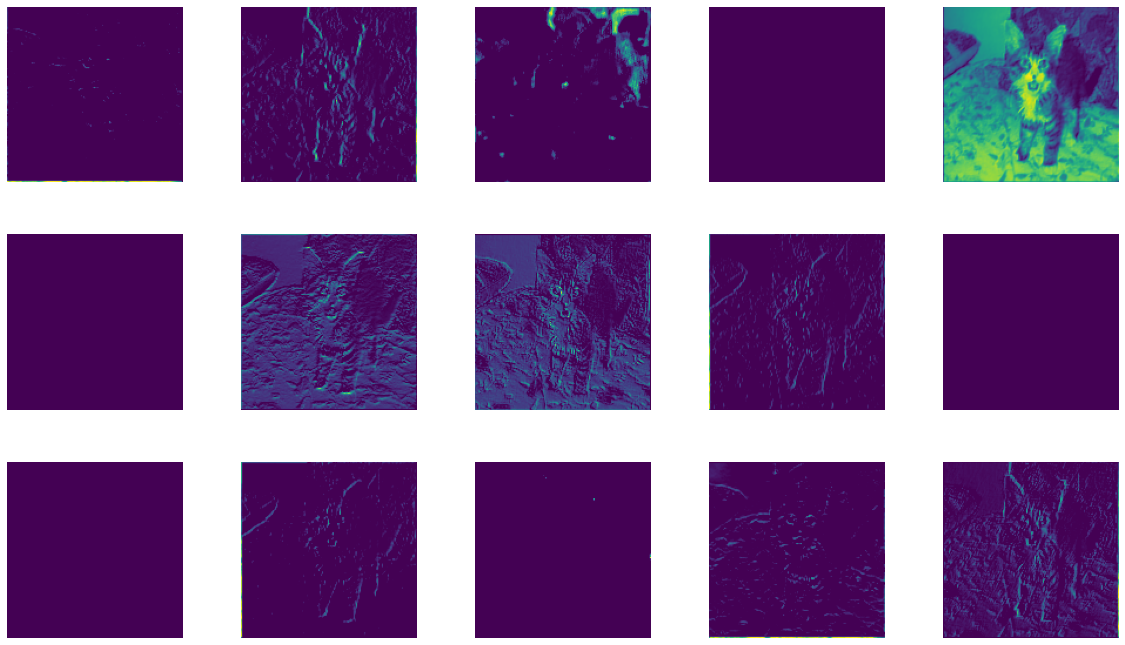

In [119]:
plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(feature_maps[0, :, :, i])
    plt.axis('off')

#### Image Embeddings Visualization

In [121]:
feature_extractor = Model(model.inputs, model.layers[-2].output)

features = feature_extractor.predict(validation_generator)

features.shape

63/63 [==============================] - 4s 65ms/step


(2000, 512)

In [122]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [124]:
pca = PCA(2)
pc_features = pca.fit_transform(features)

In [125]:
pc_features

array([[ 3.7264063 ,  1.1459925 ],
       [ 0.96748835, -4.0444646 ],
       [-2.9983363 , -1.4840447 ],
       ...,
       [-4.3205266 ,  1.1655052 ],
       [-0.89965856, -3.049861  ],
       [ 8.52834   , -1.5364053 ]], dtype=float32)

In [126]:
data[['PC1','PC2']] = pc_features
data

,filename,actual_class,predicted_class,predicted_prob,PC1,PC2
0,cats\cat.4001.jpg,0,1.0,0.750623,3.726406,1.145993
1,cats\cat.4002.jpg,0,1.0,0.802846,0.967488,-4.044465
2,cats\cat.4003.jpg,0,0.0,0.293254,-2.998336,-1.484045
3,cats\cat.4004.jpg,0,0.0,0.134388,-4.810535,0.262434
4,cats\cat.4005.jpg,0,0.0,0.185134,-3.853619,0.964708
...,...,...,...,...,...,...
1995,dogs\dog.4996.jpg,1,1.0,0.992773,12.101086,0.835632
1996,dogs\dog.4997.jpg,1,1.0,0.974171,11.618762,6.985302
1997,dogs\dog.4998.jpg,1,0.0,0.066958,-4.320527,1.165505
1998,dogs\dog.4999.jpg,1,0.0,0.488919,-0.899659,-3.049861


In [127]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [128]:
fig = px.scatter(data, x="PC1", y="PC2", color="actual_class", hover_data=['filename'])
fig.show()

In [130]:
X_embedded = TSNE(n_components=2).fit_transform(features)
X_embedded

C:\Users\emage\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\emage\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



array([[ 21.807158 ,  34.67582  ],
       [  9.799103 ,  20.233927 ],
       [ -2.302559 , -22.845646 ],
       ...,
       [  2.1424706, -42.630657 ],
       [-11.641742 ,  -8.436198 ],
       [ 17.503582 ,  49.908455 ]], dtype=float32)